In [1]:
import depoSimulator_symmetry
import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

In [2]:
import torch
import pyvista as pv

In [3]:
import pandas as pd

In [4]:
from scipy import interpolate

In [5]:
erosion = pd.read_excel('./erosionData.xlsx')
print(erosion)

           r   Erosion(mm)        残量       measure
0     0.0000 -2.034461e-11  7.000000 -6.781538e-12
1     1.0000 -6.023260e-03  7.006023 -2.007753e-03
2     2.0005 -2.159309e-02  7.021593 -7.197696e-03
3     3.0000 -1.370934e-02  7.013709 -4.569781e-03
4     4.0000  2.212784e-02  6.977872  7.375946e-03
..       ...           ...       ...           ...
94  216.0005  1.312395e-01  6.868760  4.374650e-02
95  217.0005  6.416731e-02  6.935833  2.138910e-02
96  218.0005  2.548579e-03  6.997451  8.495265e-04
97  219.0005 -1.811668e-02  7.018117 -6.038893e-03
98  220.0000  1.067665e-02  6.989323  3.558885e-03

[99 rows x 4 columns]


In [6]:
r = erosion['r'].to_numpy()/1000
measure = erosion['measure'].to_numpy()
minus_m = measure < 0
measure[minus_m] = 0
print(measure)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 7.37594558e-03 1.68061650e-02 2.42206914e-02 3.86201376e-02
 4.45037823e-02 5.70383620e-02 7.13913265e-02 8.52285051e-02
 1.12383417e-01 1.32523008e-01 1.61813558e-01 1.92421919e-01
 2.32514633e-01 2.66759135e-01 3.15154564e-01 3.51034208e-01
 3.90731662e-01 4.25414083e-01 4.70414019e-01 5.08231783e-01
 5.47367559e-01 5.86820402e-01 6.18925365e-01 6.47847559e-01
 6.69921114e-01 6.96479387e-01 7.24021238e-01 7.72727179e-01
 7.99869605e-01 8.15284918e-01 8.26137119e-01 8.31593927e-01
 8.11798996e-01 7.45949804e-01 6.85878403e-01 6.34086305e-01
 5.78240797e-01 5.43341024e-01 5.17053070e-01 5.18711393e-01
 5.17147464e-01 5.16195779e-01 5.27856335e-01 5.40463242e-01
 5.62184908e-01 5.76349044e-01 5.89457860e-01 6.06515888e-01
 6.25351112e-01 6.51129963e-01 6.97024108e-01 7.49030638e-01
 7.95645054e-01 8.46377355e-01 8.65055447e-01 8.64507697e-01
 8.68077208e-01 8.71255215e-01 8.94713462e-01 9.41617333e-01
 9.66002245e-01 9.929946

In [7]:
erosion_func = interpolate.interp1d(r, measure, kind='quadratic')

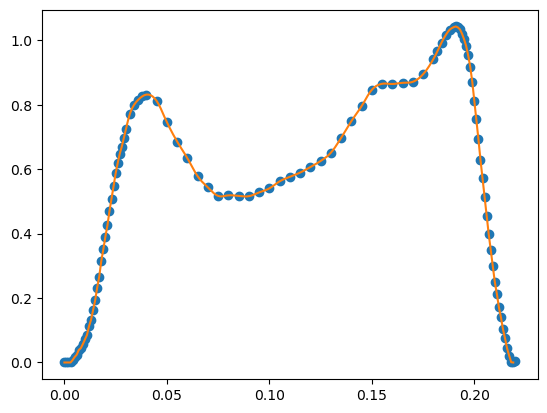

In [8]:
xnew = np.arange(0, 0.22, 0.001)
ynew = erosion_func(xnew)   # use interpolation function returned by `interp1d`
plt.plot(r, measure, 'o', xnew, ynew, '-')
plt.show()

In [9]:
erosion_bins = 200
erosion_r = np.arange(0, 0.22, 0.22/erosion_bins)
erosion_r = erosion_r + 0.22/erosion_bins/2
# print(erosion_r)

erosion_event = erosion_func(erosion_r)
erosion_event_minus = erosion_event < 0
erosion_event[erosion_event_minus] = 0
for i in range(erosion_event.shape[0]):
    erosion_event[i] *= (0.22/erosion_bins)**2 + 2*i*(0.22/erosion_bins)**2
erosion_event *= 2e7
print(erosion_event)

[0.00000000e+00 7.73766247e-03 0.00000000e+00 1.01596308e+00
 3.57471094e+00 6.59925720e+00 1.25811059e+01 1.70204230e+01
 2.55649346e+01 3.52831622e+01 5.08248293e+01 6.96158770e+01
 9.32988695e+01 1.22291329e+02 1.61830158e+02 2.01700571e+02
 2.56633691e+02 3.05441777e+02 3.60726615e+02 4.20182436e+02
 4.87865560e+02 5.55083748e+02 6.28899588e+02 6.98740236e+02
 7.66708168e+02 8.28274468e+02 8.98617078e+02 9.72552600e+02
 1.04683872e+03 1.11464890e+03 1.17375132e+03 1.22843993e+03
 1.27988255e+03 1.33022604e+03 1.37912635e+03 1.42578143e+03
 1.46931434e+03 1.50889128e+03 1.54418101e+03 1.57454280e+03
 1.59909507e+03 1.61743582e+03 1.62917069e+03 1.63427332e+03
 1.63771375e+03 1.64125419e+03 1.64500236e+03 1.64906598e+03
 1.65338919e+03 1.65769114e+03 1.66203168e+03 1.66648461e+03
 1.67105246e+03 1.67388778e+03 1.67408644e+03 1.67156294e+03
 1.66623183e+03 1.65932213e+03 1.65495813e+03 1.65363464e+03
 1.65556226e+03 1.66091177e+03 1.66718248e+03 1.67278727e+03
 1.67772600e+03 1.681998

(656436,)


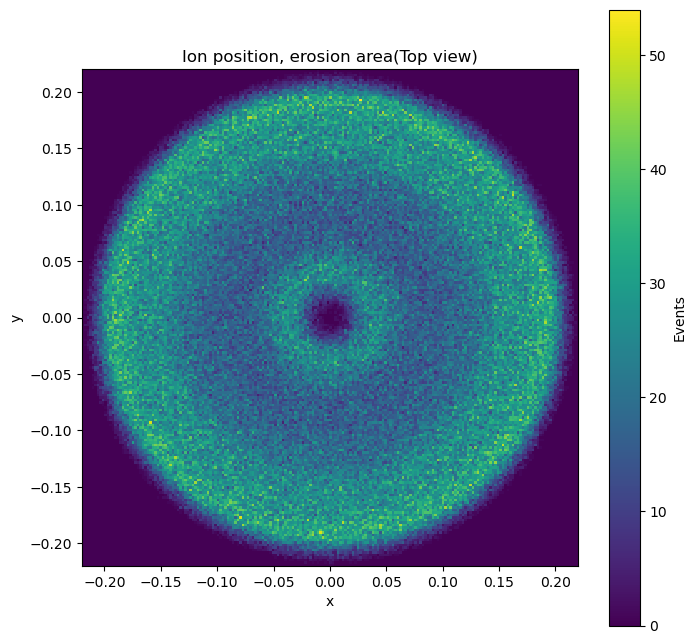

In [10]:
gen_dist_x = np.array([])
gen_dist_y = np.array([])

# r = np.linspace(0, 0.22, 22)
bins = 200
r = 0.22/bins

for i in range(bins):
    # print(i)
    # print(erosion_event[0][i])
    theta = np.random.rand(int(erosion_event[i]))*2*np.pi
    # print(theta.shape)
    # print(np.multiply((np.random.rand(int(erosion_event[0][i]))*0.01 + i*0.01), np.cos(theta)).shape)
    gen_dist_x = np.concatenate((gen_dist_x, np.multiply((np.random.rand(int(erosion_event[i]))*r + i*r), np.cos(theta))))
    # print(np.array(gen_dist_x).shape)
    gen_dist_y = np.concatenate((gen_dist_y, np.multiply((np.random.rand(int(erosion_event[i]))*r + i*r), np.sin(theta))))

print(gen_dist_x.shape)

xbins = np.linspace(-0.22,0.22,200)
ybins = np.linspace(-0.22,0.22,200)
# ybins = np.linspace(1.815, 2.415, 200)
x_bins = np.histogram(gen_dist_x, bins=xbins)
y_bins = np.histogram(gen_dist_y, bins=ybins)

H, xedges, yedges = np.histogram2d(gen_dist_x, gen_dist_y, bins=(xbins, ybins))


fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax.set_title('Ion position, erosion area(Top view)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(im, ax=ax, label='Events')
plt.show()

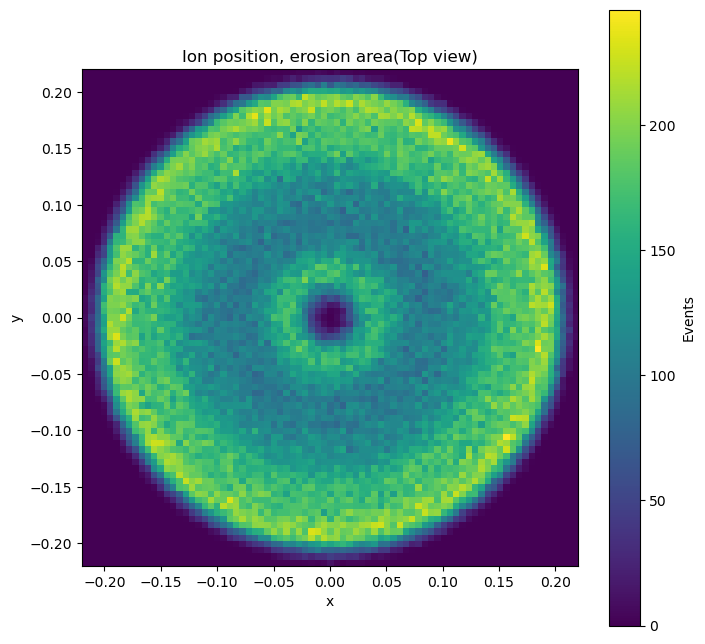

Widget(value='<iframe src="http://localhost:62652/index.html?ui=P_0x1f8532acc90_0&reconnect=auto" class="pyvis…

In [11]:
xbins = np.linspace(-0.22,0.22,80)
ybins = np.linspace(-0.22,0.22,80)
# ybins = np.linspace(1.815, 2.415, 200)
x_bins = np.histogram(gen_dist_x, bins=xbins)
y_bins = np.histogram(gen_dist_y, bins=ybins)

H, xedges, yedges = np.histogram2d(gen_dist_x, gen_dist_y, bins=(xbins, ybins))


fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax.set_title('Ion position, erosion area(Top view)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(im, ax=ax, label='Events')
plt.show()

xbins = np.linspace(-22,22,79)
ybins = np.linspace(-22,22,79)
x, y = np.meshgrid(xbins, ybins)

grid = pv.StructuredGrid(x, y, H/200)
grid.plot()

In [12]:
gen_dist_x.shape

(656436,)

In [13]:
def rfunc(x): #Release factor function
    # print("-------rfunc------")
    # print(x)
    n = 1.6
    beta = -0.7
    y = np.cos(x) ** n * (1 + beta * np.cos(x) ** 2)# * (n ** 2 + 4 * n + 3) / (n * beta + n + beta + 3) /2 / pi
    return y

In [14]:
theta_bins_size = 100
theta_bins = np.linspace(-np.pi/2, np.pi/2, theta_bins_size)
theta_hist_x = theta_bins + np.pi/((theta_bins_size-1)*2)
theta_hist_x = theta_hist_x[:-1]
print(theta_bins)
print(theta_hist_x)

[-1.57079633 -1.53906307 -1.50732981 -1.47559655 -1.44386329 -1.41213003
 -1.38039677 -1.34866351 -1.31693025 -1.28519699 -1.25346374 -1.22173048
 -1.18999722 -1.15826396 -1.1265307  -1.09479744 -1.06306418 -1.03133092
 -0.99959766 -0.9678644  -0.93613114 -0.90439789 -0.87266463 -0.84093137
 -0.80919811 -0.77746485 -0.74573159 -0.71399833 -0.68226507 -0.65053181
 -0.61879855 -0.58706529 -0.55533203 -0.52359878 -0.49186552 -0.46013226
 -0.428399   -0.39666574 -0.36493248 -0.33319922 -0.30146596 -0.2697327
 -0.23799944 -0.20626618 -0.17453293 -0.14279967 -0.11106641 -0.07933315
 -0.04759989 -0.01586663  0.01586663  0.04759989  0.07933315  0.11106641
  0.14279967  0.17453293  0.20626618  0.23799944  0.2697327   0.30146596
  0.33319922  0.36493248  0.39666574  0.428399    0.46013226  0.49186552
  0.52359878  0.55533203  0.58706529  0.61879855  0.65053181  0.68226507
  0.71399833  0.74573159  0.77746485  0.80919811  0.84093137  0.87266463
  0.90439789  0.93613114  0.9678644   0.99959766  1.

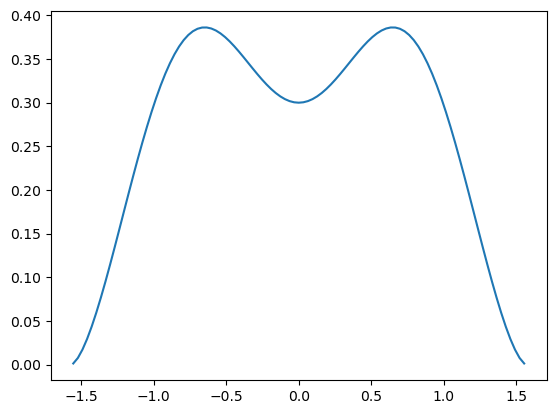

In [15]:
theta_hist_y = rfunc(theta_hist_x)

fig, ax = plt.subplots(1, 1)

ax.plot(theta_hist_x, theta_hist_y)

In [16]:
print(theta_hist_y.shape)
theta_hist_y *= 1e6
print(theta_hist_y.max())
print(theta_hist_y.sum())

(99,)
386154.61540225823
26611599.97796327


In [17]:
theta_sample = np.array([])

for i in range(theta_bins.shape[0] - 1):
    theta_sample = np.concatenate(( theta_sample, np.random.uniform(theta_bins[i], theta_bins[i+1], int(theta_hist_y[i]))))

(26611546,)


(array([  1311.,   7508.,  16888.,  28781.,  42461.,  57997.,  75122.,
         92886., 111831., 131359., 151186., 171117., 191143., 211094.,
        229984., 248365., 266922., 283088., 299413., 313910., 327210.,
        338751., 350286., 357982., 366281., 372734., 376706., 379844.,
        381883., 382407., 381429., 379380., 377260., 372552., 368359.,
        363031., 356621., 351109., 345239., 337638., 331986., 326172.,
        319835., 315245., 310080., 305634., 301970., 300498., 298339.,
        297369., 296826., 297953., 299902., 303013., 305272., 310414.,
        315027., 319568., 326378., 331915., 338589., 344304., 350709.,
        357604., 363066., 368025., 372829., 376746., 378792., 381663.,
        382455., 382092., 379919., 377044., 372024., 366360., 359238.,
        349603., 338867., 326576., 313936., 299579., 283374., 266193.,
        248948., 230267., 210840., 191204., 170790., 151468., 131336.,
        111700.,  92980.,  74984.,  58040.,  42557.,  28701.,  16881.,
      

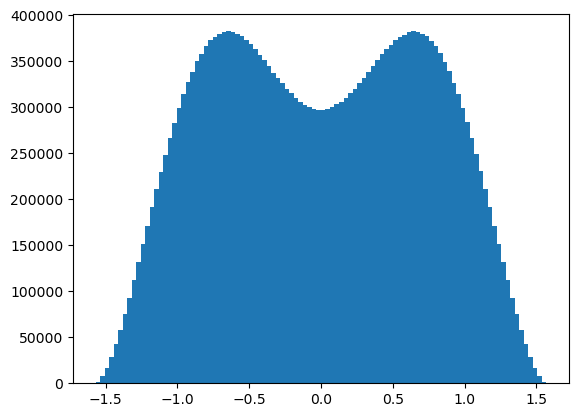

In [18]:
print(theta_sample.shape)
plt.hist(theta_sample, bins=100)

In [19]:
np.random.shuffle(theta_sample)
# np.save('thetaSampe_Al_1p6',theta_sample)

(array([  35.,  190.,  434.,  707., 1007., 1427., 1853., 2368., 2739.,
        3174., 3831., 4163., 4680., 5281., 5743., 6192., 6561., 7043.,
        7536., 7736., 8058., 8435., 8593., 8882., 9198., 9177., 9238.,
        9455., 9360., 9356., 9365., 9341., 9265., 9155., 8899., 8833.,
        8774., 8627., 8488., 8182., 8293., 8175., 7959., 7675., 7687.,
        7584., 7522., 7433., 7482., 7250., 7367., 7328., 7377., 7466.,
        7559., 7778., 7810., 7939., 8059., 8198., 8250., 8550., 8496.,
        8753., 8972., 9056., 9272., 9404., 9206., 9264., 9423., 9382.,
        9452., 9175., 9242., 8988., 8760., 8577., 8313., 8065., 7925.,
        7516., 7061., 6502., 6106., 5640., 5218., 4832., 4223., 3671.,
        3284., 2748., 2265., 1810., 1399., 1021.,  694.,  383.,  181.,
          35.]),
 array([-1.57000175e+00, -1.53859702e+00, -1.50719229e+00, -1.47578755e+00,
        -1.44438282e+00, -1.41297809e+00, -1.38157336e+00, -1.35016862e+00,
        -1.31876389e+00, -1.28735916e+00, -1.25595

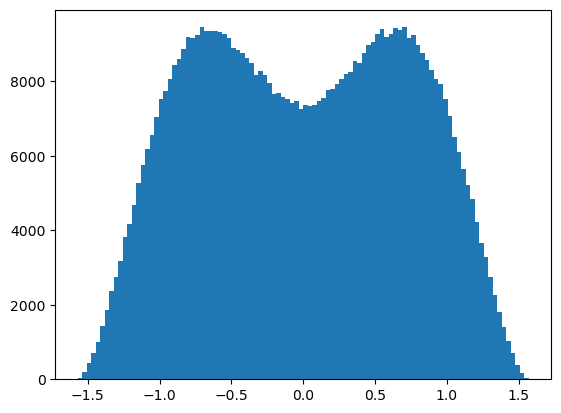

In [20]:
plt.hist(theta_sample[:int(gen_dist_x.shape[0])], bins=100)

In [21]:
T = 300
Cm = (2*1.380649e-23*T/(27*1.66e-27) )**0.5 # (2kT/m)**0.5 27 for the Al

In [22]:
def max_velocity_u(Cm, random1, random2):
    return Cm*np.sqrt(-np.log(random1))*np.cos(2*np.pi*random2)

def max_velocity_w(Cm, random1, random2):
    return Cm*np.sqrt(-np.log(random1))*np.sin(2*np.pi*random2)

def max_velocity_v(Cm, random3):
    return -Cm*np.sqrt(-np.log(random3))

In [23]:
N = gen_dist_x.shape[0]

Random1 = np.random.rand(N)
Random2 = np.random.rand(N)
Random3 = np.random.rand(N)

velosity_matrix = np.array([max_velocity_u(Cm, Random1, Random2), max_velocity_w(Cm, Random1, Random2), max_velocity_v(Cm, Random3)]).T

print(velosity_matrix.shape)

(656436, 3)


(656436,)


C:\Users\URCS049\AppData\Local\Temp\ipykernel_37404\711687607.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


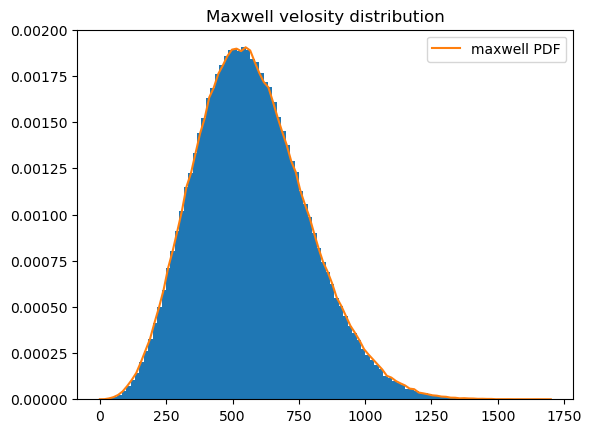

In [24]:
velosity_norm = np.linalg.norm(velosity_matrix, axis=1)
print(velosity_norm.shape)

# fig, ax = plt.subplots(1, 1)

# maxwell = ax.hist(velosity_norm, density=False, bins=100, histtype='step')
maxwellDist = np.histogram(velosity_norm, bins=100)

import scipy.stats

hist_dist = scipy.stats.rv_histogram(maxwellDist, density=False)

X = np.linspace(0, 1700.0, 100)
fig, ax = plt.subplots()
ax.set_title("Maxwell velosity distribution")
ax.hist(velosity_norm, density=True, bins=100)
ax.plot(X, hist_dist.pdf(X), label='maxwell PDF')

# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()
fig.show()

In [26]:
theta = theta_sample[:int(gen_dist_x.shape[0])]
phi = np.random.rand(gen_dist_x.shape[0])*2*np.pi
vel_x = np.cos(phi)*np.sin(theta)*velosity_norm
vel_y = np.sin(phi)*np.sin(theta)*velosity_norm
vel_z = np.cos(theta)*velosity_norm

velosity_matrix_2 = np.array([vel_x, vel_y, -vel_z]).T

In [27]:
print(velosity_matrix_2.shape)

(656436, 3)


(array([1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 4.0000e+00, 1.0000e+00, 2.0000e+00, 4.0000e+00,
        3.0000e+00, 7.0000e+00, 8.0000e+00, 6.0000e+00, 6.0000e+00,
        2.0000e+01, 1.4000e+01, 1.5000e+01, 2.7000e+01, 3.3000e+01,
        3.3000e+01, 5.0000e+01, 4.0000e+01, 7.9000e+01, 7.8000e+01,
        8.7000e+01, 9.2000e+01, 1.4300e+02, 1.6300e+02, 1.8100e+02,
        2.1900e+02, 2.7100e+02, 3.1600e+02, 3.7400e+02, 4.4900e+02,
        4.9800e+02, 6.4100e+02, 6.9300e+02, 8.8200e+02, 9.9200e+02,
        1.0890e+03, 1.3630e+03, 1.6080e+03, 1.8040e+03, 1.9740e+03,
        2.2340e+03, 2.6140e+03, 2.9420e+03, 3.2930e+03, 3.6250e+03,
        4.1200e+03, 4.6480e+03, 5.1580e+03, 5.6800e+03, 6.2130e+03,
        6.8470e+03, 7.4670e+03, 8.0840e+03, 8.8690e+03, 9.7070e+03,
        1.0418e+04, 1.1164e+04, 1.1956e+04, 1.3024e+04, 1.3516e+04,
        1.4480e+04, 1.5087e+04, 1.6145e+04, 1.6478e+04, 1.7357e+04,
        1.7887e+04, 1.8769e+04, 1.9202e+04, 1.98

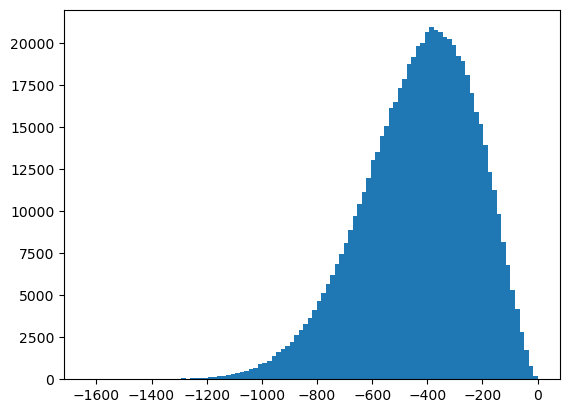

In [30]:
plt.hist(velosity_matrix_2[:, 2], bins=100)

In [5]:
from scipy.special import gamma, factorial

In [6]:
def diVr_func(d_refi, eVr, wi):
    kb = 1.380649e-23
    Tref = 300
    ev = 1.62e-19
    diVr = d_refi * np.sqrt(((kb*Tref)/(eVr*ev))**(wi-1/2)*gamma(5/2 - wi))
    return diVr

In [7]:
def Chi_b_V(b, d_refi, eVr, wi):
    return np.pi*(1 - b/diVr_func(d_refi, eVr, wi))


(0.0, 4.0)

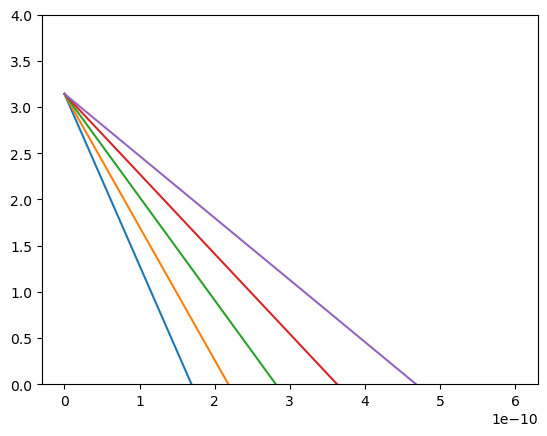

In [8]:
b = np.linspace(0, 6*1e-10, 50)

fig, ax = plt.subplots(1,1)
ax.plot(b, Chi_b_V(b, (4.614 + 4.151)/2*1e-10, 100, 0.721))
ax.plot(b, Chi_b_V(b, (4.614 + 4.151)/2*1e-10, 10, 0.721))
ax.plot(b, Chi_b_V(b, (4.614 + 4.151)/2*1e-10, 1, 0.721))
ax.plot(b, Chi_b_V(b, (4.614 + 4.151)/2*1e-10, 0.1, 0.721))
ax.plot(b, Chi_b_V(b, (4.614 + 4.151)/2*1e-10, 0.01, 0.721))
ax.set_ylim(0, 4)

In [9]:
print(Chi_b_V(b, (4.614 + 4.151)/2*1e-10, 100, 0.721))

[ 3.14159265  2.91406551  2.68653836  2.45901122  2.23148408  2.00395693
  1.77642979  1.54890264  1.3213755   1.09384835  0.86632121  0.63879407
  0.41126692  0.18373978 -0.04378737 -0.27131451 -0.49884166 -0.7263688
 -0.95389595 -1.18142309 -1.40895023 -1.63647738 -1.86400452 -2.09153167
 -2.31905881 -2.54658596 -2.7741131  -3.00164024 -3.22916739 -3.45669453
 -3.68422168 -3.91174882 -4.13927597 -4.36680311 -4.59433026 -4.8218574
 -5.04938454 -5.27691169 -5.50443883 -5.73196598 -5.95949312 -6.18702027
 -6.41454741 -6.64207455 -6.8696017  -7.09712884 -7.32465599 -7.55218313
 -7.77971028 -8.00723742]


In [10]:
def DXsec(d_refi, eVr, wi, chi):
    return diVr_func(d_refi, eVr, wi)**2/(np.pi * np.sin(chi))*(1 - chi/np.pi)

In [54]:
def TotXsec(d_refi, eVr, wi):
    return np.pi * diVr_func(d_refi, eVr, wi)**2

C:\Users\URCS049\AppData\Local\Temp\ipykernel_14340\3033641411.py:5: RuntimeWarning: divide by zero encountered in divide
  diVr = d_refi * np.sqrt(((kb*Tref)/(eVr*ev))**(wi-1/2)*gamma(5/2 - wi))


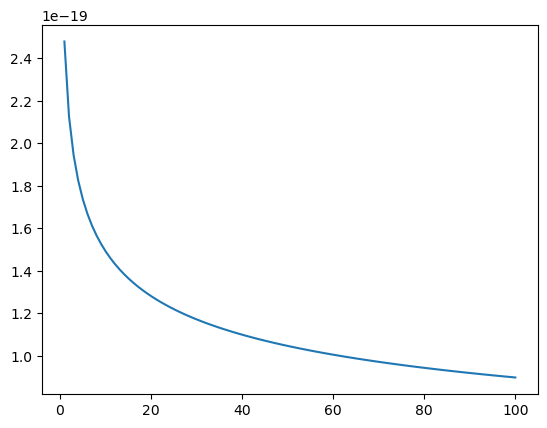

In [50]:
enery = np.linspace(0, 100, 100)

fig, ax = plt.subplots(1,1)
ax.plot(enery, TotXsec((4.614 + 4.151)/2*1e-10, enery, 0.721))


In [57]:
enery = np.linspace(0, 100, 100)
totXsection = TotXsec((4.614 + 4.151)/2*1e-10, enery, 0.721)
totXsection[0] = 0
print(totXsection)

[0.00000000e+00 2.47929900e-19 2.12716547e-19 1.94484550e-19
 1.82504529e-19 1.73722685e-19 1.66862013e-19 1.61273213e-19
 1.56583508e-19 1.52560221e-19 1.49048944e-19 1.45942278e-19
 1.43162690e-19 1.40652490e-19 1.38367664e-19 1.36273916e-19
 1.34344035e-19 1.32556092e-19 1.30892174e-19 1.29337469e-19
 1.27879602e-19 1.26508131e-19 1.25214174e-19 1.23990112e-19
 1.22829369e-19 1.21726227e-19 1.20675691e-19 1.19673368e-19
 1.18715378e-19 1.17798279e-19 1.16919004e-19 1.16074807e-19
 1.15263223e-19 1.14482031e-19 1.13729221e-19 1.13002972e-19
 1.12301628e-19 1.11623677e-19 1.10967737e-19 1.10332543e-19
 1.09716930e-19 1.09119828e-19 1.08540248e-19 1.07977278e-19
 1.07430071e-19 1.06897842e-19 1.06379862e-19 1.05875452e-19
 1.05383979e-19 1.04904851e-19 1.04437516e-19 1.03981456e-19
 1.03536187e-19 1.03101252e-19 1.02676223e-19 1.02260697e-19
 1.01854296e-19 1.01456660e-19 1.01067452e-19 1.00686353e-19
 1.00313060e-19 9.99472872e-20 9.95887637e-20 9.92372322e-20
 9.88924486e-20 9.855418

C:\Users\URCS049\AppData\Local\Temp\ipykernel_14340\3033641411.py:5: RuntimeWarning: divide by zero encountered in divide
  diVr = d_refi * np.sqrt(((kb*Tref)/(eVr*ev))**(wi-1/2)*gamma(5/2 - wi))


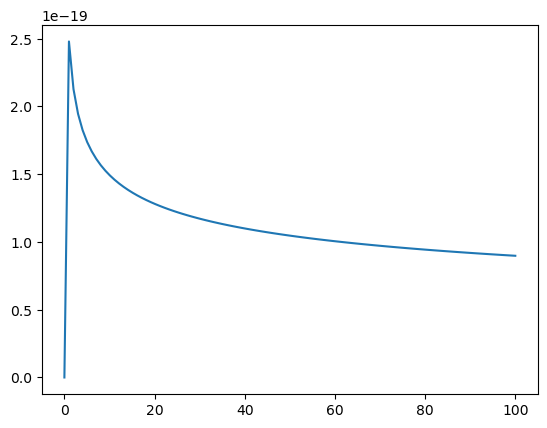

In [58]:
fig, ax = plt.subplots(1,1)
ax.plot(enery, totXsection)

C:\Users\URCS049\AppData\Local\Temp\ipykernel_37404\1106864369.py:2: RuntimeWarning: divide by zero encountered in divide
  return diVr_func(d_refi, eVr, wi)**2/(np.pi * np.sin(chi))*(1 - chi/np.pi)


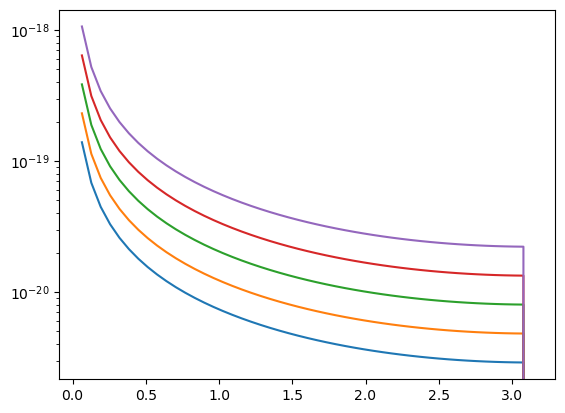

In [62]:
chiX = np.linspace(0, np.pi)

fig, ax = plt.subplots(1,1)
ax.plot(chiX, DXsec((4.614 + 4.151)/2*1e-10, 100, 0.721, chiX))
ax.plot(chiX, DXsec((4.614 + 4.151)/2*1e-10, 10, 0.721, chiX))
ax.plot(chiX, DXsec((4.614 + 4.151)/2*1e-10, 1, 0.721, chiX))
ax.plot(chiX, DXsec((4.614 + 4.151)/2*1e-10, 0.1, 0.721, chiX))
ax.plot(chiX, DXsec((4.614 + 4.151)/2*1e-10, 0.01, 0.721, chiX))
ax.set_yscale('log')


In [13]:
from scipy.stats import rv_continuous
from math import exp
from scipy.stats.sampling import NumericalInversePolynomial

In [14]:
def DXsec(d_refi, eVr, wi, chi):
    if chi == 0:
        return 0
    if chi != 0:
        return diVr_func(d_refi, eVr, wi)**2/(np.pi * np.sin(chi))*(1 - chi/np.pi)
    

C:\Users\URCS049\AppData\Local\Temp\ipykernel_14340\27230735.py:15: RuntimeWarning: [objid: PINV.027] 102 : center moved into domain of distribution => 
  rng50 = NumericalInversePolynomial(dist50, domain=[0.1, np.pi], random_state=urng)
C:\Users\URCS049\AppData\Local\Temp\ipykernel_14340\27230735.py:19: RuntimeWarning: [objid: PINV.028] 102 : center moved into domain of distribution => 
  rng100 = NumericalInversePolynomial(dist100, domain=[0.1, np.pi], random_state=urng)


[0.91871732 0.22016908 0.16485271 ... 1.22623511 1.52263734 0.37910478]


(array([84661., 66523., 54256., 45734., 39915., 34908., 30885., 28102.,
        25292., 23360., 21192., 19483., 18627., 17306., 16258., 15163.,
        14327., 13417., 12788., 12221., 11644., 10979., 10576., 10061.,
         9697.,  9430.,  8882.,  8894.,  8455.,  8329.,  7862.,  7715.,
         7431.,  7026.,  6965.,  6748.,  6669.,  6527.,  6367.,  6013.,
         6044.,  5790.,  5718.,  5402.,  5467.,  5325.,  5296.,  5191.,
         4978.,  4762.,  4895.,  4797.,  4782.,  4627.,  4402.,  4549.,
         4471.,  4245.,  4169.,  4165.,  4130.,  4115.,  3965.,  3986.,
         3898.,  3976.,  3827.,  3737.,  3707.,  3691.,  3725.,  3609.,
         3626.,  3540.,  3492.,  3586.,  3492.,  3471.,  3405.,  3502.,
         3406.,  3326.,  3328.,  3327.,  3360.,  3256.,  3282.,  3313.,
         3257.,  3251.,  3302.,  3229.,  3306.,  3206.,  3240.,  3298.,
         3356.,  3247.,  3237.,  3230.]),
 array([0.10000057, 0.13041647, 0.16083237, 0.19124827, 0.22166417,
        0.25208007, 0.2824

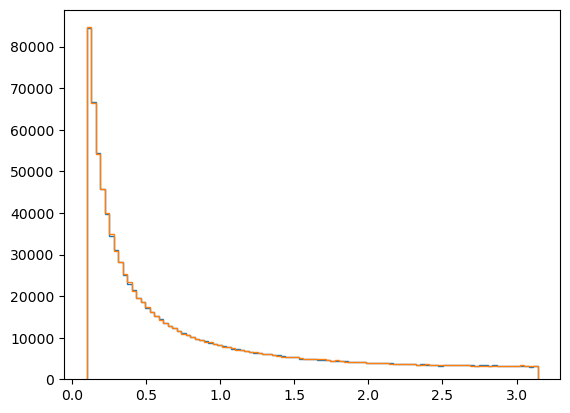

In [46]:
class DCS_gen_50(rv_continuous):
    "Dcs distribution"
    def _pdf(self, x):
       return DXsec((4.614 + 4.151)/2*1e-10, 0.01, 0.721, x)
    

class DCS_gen_100(rv_continuous):
    "Dcs distribution"
    def _pdf(self, x):
       return DXsec((4.614 + 4.151)/2*1e-10, 100, 0.721, x)
    
urng = np.random.default_rng()

dist50 =DCS_gen_50()
rng50 = NumericalInversePolynomial(dist50, domain=[0.1, np.pi], random_state=urng)
rvs50 = rng50.rvs(size=1000000)

dist100 =DCS_gen_100()
rng100 = NumericalInversePolynomial(dist100, domain=[0.1, np.pi], random_state=urng)
rvs100 = rng100.rvs(size=1000000)
print(rvs100)
plt.hist(rvs100, bins= 100, histtype='step', stacked=True, fill=False)
plt.hist(rvs50, bins= 100, histtype='step', stacked=True, fill=False)


In [47]:
print(rvs50.shape)

(1000000,)


In [48]:
def DCS_pdf(energy):
    randChoice = np.random.randint(int(1e6), size=(energy.shape[0]))
    chi = rvs50[randChoice]
    return chi

In [49]:
print(DCS_pdf(np.array([0.4, 0.7, 1, 11])))

[2.89636168 0.35434869 3.12913949 0.52682838]


In [14]:
film = np.zeros((100, 100, 120))

bottom = 10
film[:, :, 0:bottom] = 10 # bottom

height = 50
left_side = 28
right_side = 28
film[:, 100-right_side:, 0:height] = 10
film[:, 0:left_side, 0:height] = 10
film[100-right_side:, :, 0:height] = 10
film[0:left_side, :, 0:height] = 10

In [15]:
N = gen_dist_x.shape[0]
print(N)

656436


In [16]:
test = depoSimulator_symmetry.depo(param = [1.6, -0.7], TS = 0.3, N = gen_dist_x.shape[0], sub_xy=[0,0], film=film, n=1, cellSize=[100, 100, 120], celllength=1, kdtreeN=5, tstep=1e-3)

In [17]:
filmMac = test.target_substrate(Ero_dist_x=gen_dist_x, Ero_dist_y=gen_dist_y, sub_x=0, sub_y=0)

In [18]:
print(filmMac[0].shape)
print(filmMac[0].max())
print(filmMac[0].min())

(656436,)
0.3861165745629064
0.3000679131217247


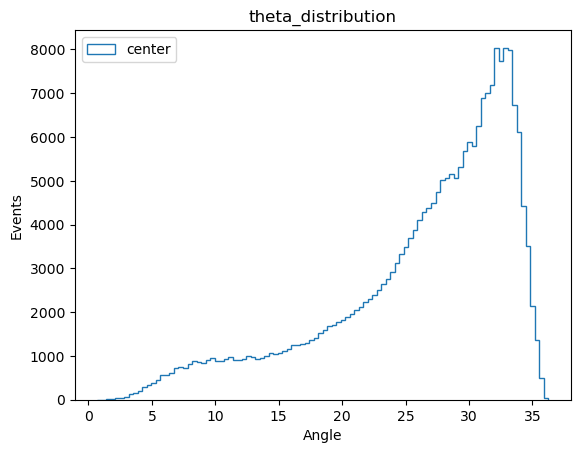

In [20]:
fig, ax = plt.subplots(1, 1)

dist_center_theta = ax.hist(filmMac[1],  weights=filmMac[0], bins=100, histtype='step',label='center')
ax.set_ylabel('Events')
ax.set_xlabel('Angle')
ax.set_title('theta_distribution')
ax.legend(loc="upper left")